 ANALISIS EXPLORATORIO DE DATOS EDA . LA MÚSICA COMO LENGUAJE GLOBAL.  

1. ÍNDICE:
    1.1 Hipótesis
    1.2 Limpieza de datos 
    1.3 Visualización 
2. Conclusiones 


1. INTRODUCCIÓN:
    1.1 Introducción: 
    Este análisis exploratorio de datos se ha realizado a partir de los datasets en formato csv que he encontrado en Kaggle.
 La idea original era extraerlos a partir de la API de Spotify, aunque por el plazo de entrega haremos una aproximación con los últimos datos extraídos y disponibles en Kaggle. Este dataset cuenta con los datos de más de 87 países, que es el número total donde dicho servicio de música  y podcasts se encontraba  disponible a fecha 2021.  Dada la expansión posterior de Spotify , estas conclusiones podrían variar al haber aumentado tanto las regiones donde se ofrece el servicio como el número de usuarios. No obstante la muestra de este dataset es grande, por lo que en líneas generales, para los países incluídos hasta la fecha, serían válidas y no presentarían grandes sesgos.  
     
    


1.1 Hipótesis 
Planteamiento de hipótesis
La hipótesis fundamental sería saber si podemos establecer algún patrón rítmico universal, basado en la mayor popularidad de una canción,  que nos ayude a recomendar playlists y si estas podrían influir en el estado de ánimo de los usuarios . 
1. Influye el lenguaje en la música que escuchamos? 
2. Existen sonidos más apreciados? 
3. A qué llamamos música? 
4. Cómo ha cambiado este patrón a lo largo de las décadas? 
5. Son más populares las canciones  canciones tristes y alegres? 


1.1 Limpieza de datos 

Empezamos instalando e importando las librerías que vamos a utilizar. 

In [1]:
!pip install -U scikit-learn

In [10]:
!pip install pingouin

     -------------------------------------- 198.6/198.6 kB 6.1 MB/s eta 0:00:00
     -------------------------------------- 979.5/979.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=5c2c4be9e029fcc6e350c047590a6d7273156eec321935e66dfa663be2807481
  Stored in directory: c:\users\mareg\appdata\local\pip\cache\wheels\3d\fe\b0\27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [20]:
!pip install networkx

     ---------------------------------------- 2.1/2.1 MB 4.7 MB/s eta 0:00:00


In [81]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from  matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import pingouin as pg
from scipy.stats import ttest_ind
import networkx as nx
import ast



In [82]:
#pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

Ruta del fichero: 
Cargamos los datos 

 Además vamos a cambiar la columna release_date , que es una variable de tipo object a datetime, para poder trabajar con ellas y hacemos un head para ver las 5 primeras filas.

In [83]:

#df_tracks = pd.read_csv("Ruta_fichero")

df_tracks = pd.read_csv(r"C:\Users\mareg\OneDrive\Escritorio\SPOTIFY CSV\archive (4)\tracks.csv", encoding = "UTF-8",parse_dates=['release_date'])
df_tracks.head()



id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4   1922-01-01         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

Vistazo a las diferentes columnas y tipo de variables 

In [84]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

Miramos el numero de valores nulos por cada columna 
(En este dataset sólo hay nulos en los nombres de las canciones)

In [94]:
df_tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [7]:
null_names = df_tracks[df_tracks['name'].isnull()]['id_artists'].unique()
print(null_names)

["['0LyfQWJT6nXafLPZqxe9Of']"]


Parece ser que se trata de un único artista, cuyas canciones no tienen nombre o se han subido sin él. Dado que los demás datos están completos, no lo voy a borrar, por si fuera un autor antiguo que aportaría información sobre los primeros años de este dataframe. 

No obstante voy a comprobar si existe algún datos tipo string que pueda estar alterando los datos en la columna de los artistas, y voy a eliminar los espacios en blanco. 

In [8]:
null_names = df_tracks[df_tracks['name'].isnull()]['id_artists'].unique()
null_artists = df_tracks[df_tracks['name'].isnull()]['artists'].unique()
print(null_names)
print(null_artists)

["['0LyfQWJT6nXafLPZqxe9Of']"]
["['']"]


In [9]:
df_tracks['artists'] = df_tracks['artists'].str.strip()
null_names = df_tracks[df_tracks['name'].isnull()]['artists'].unique()
print(null_names)

["['']"]


In [10]:
print(df_tracks['artists'].unique())

["['Uli']" "['Fernando Pessoa']" "['Ignacio Corsini']" ... "['阿YueYue']"
 "['ROLE MODEL']" "['Gentle Bones', 'Clara Benin']"]


In [12]:
df_tracks['artists'] = df_tracks['artists'].replace('\s+', ' ', regex=True)
df_tracks['artists'] = df_tracks['artists'].str.strip()
null_names = df_tracks[df_tracks['name'].isnull()]['artists'].unique()
print(null_names)

["['']"]


In [13]:
null_artists = df_tracks[df_tracks['artists'] == '']['artists'].unique()
print(null_artists)

[]


In [14]:
null_names = df_tracks[df_tracks['name'] == '']['artists'].unique()
print(null_names)

[]


He decidido no eliminar las filas que no tienen nombre porque son casi todas del mismo artista y es conocido (Louis Armstrong), puede que sean melódicas? pero dejo la formula por si es necesaria posteriormente 

In [14]:
# Dropping rows where name is null
#df_tracks_data.dropna(subset=['name'], axis=0, inplace=True) 

Vamos a realizar una última comprobación, el número de NULOS pero de un modo más visual a través de una muestra de 25000 filas aleatorias 

<AxesSubplot:>

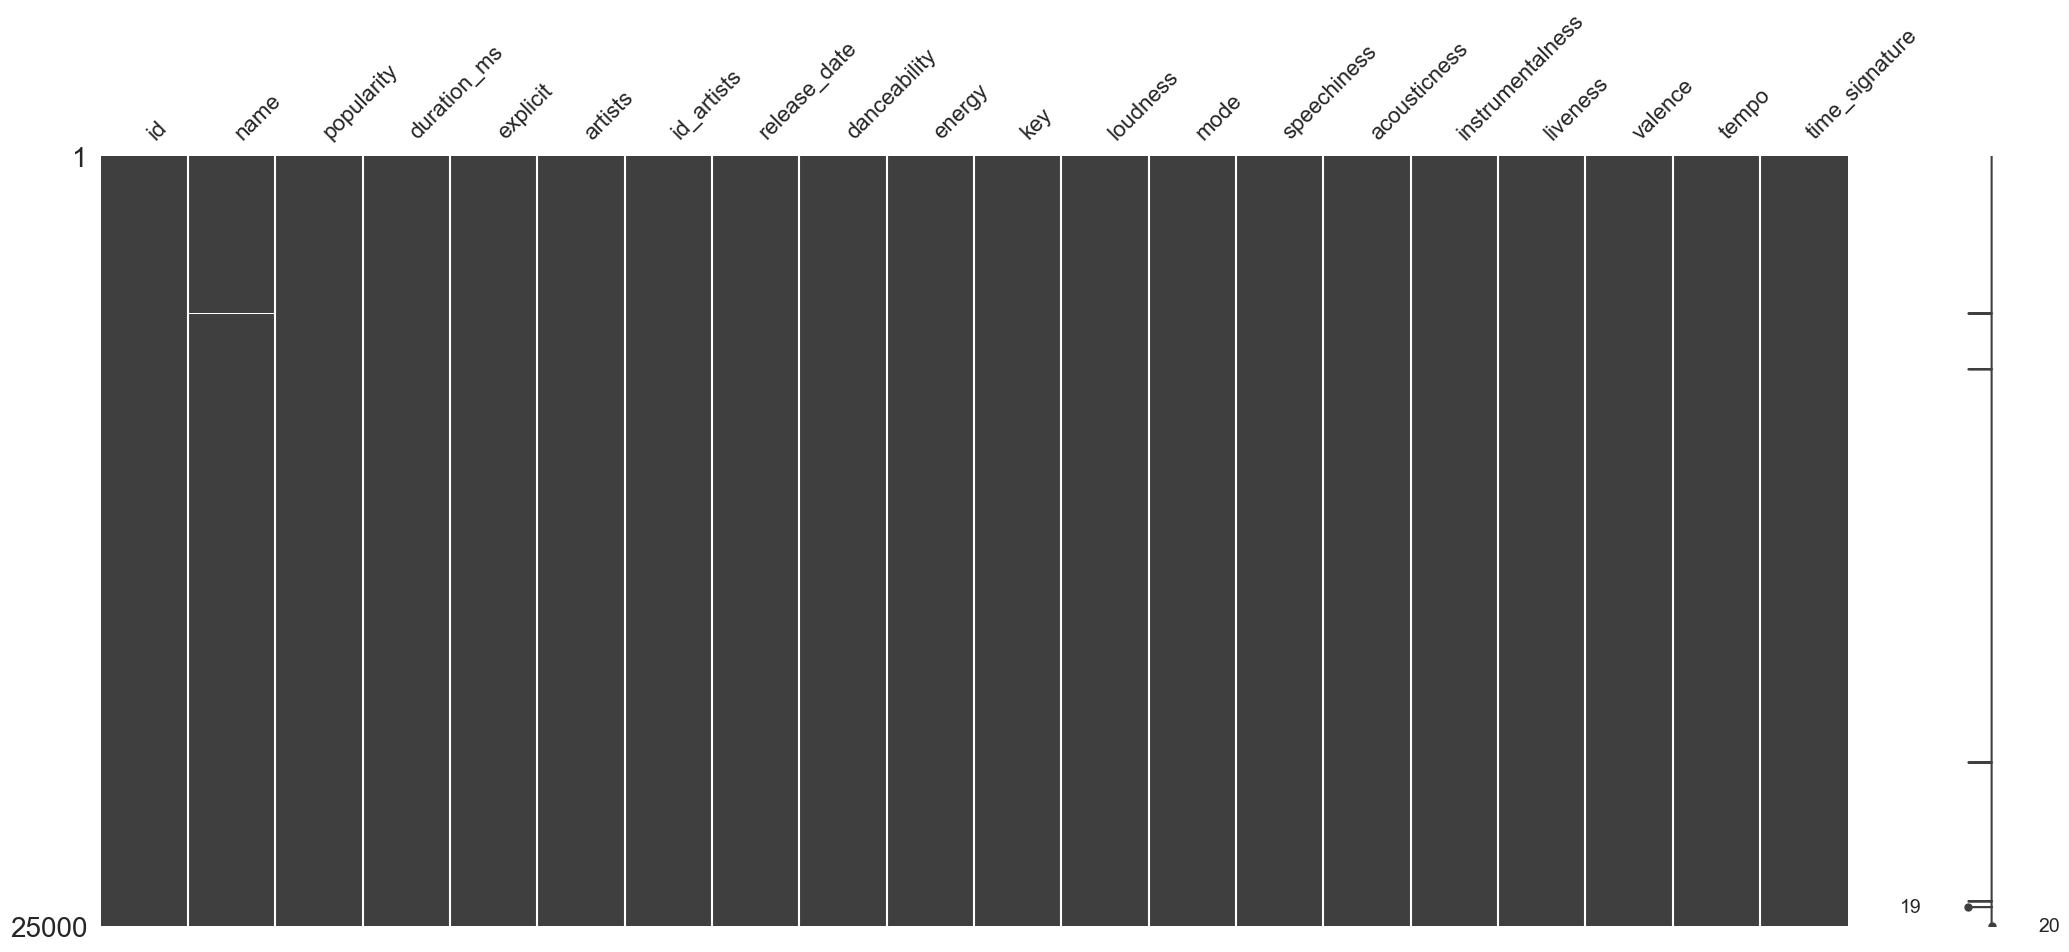

In [15]:

%matplotlib inline
msno.matrix(df_tracks.sample(25000))

Ahora eliminamos los duplicados con el mismo nombre de canción y artista 

In [85]:

df_tracks = df_tracks.drop_duplicates(
  subset = ['name', 'id_artists'],
  keep = 'last').reset_index(drop = True)
df_tracks.head(3)


id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645   0.445    0   -13.338     1       0.4510   
1   1922-06-01         0.695   0.263    0   -22.136     1       0.9570   
2   1922-03-21         0.434   0.177    1   -21.180     1       0.0512   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5

In [86]:
df_tracks.shape

(526784, 20)

Limpieza de datos y normalización , para que los nombres de los artistas se puedan comparar.
on la función lambda convertimos cada columna en una serie.
La función stack() apila las series  del paso anterior en una serie única.

In [87]:
copia_artistas = df_tracks['artists'].copy()

In [88]:
x= copia_artistas.apply(ast.literal_eval)

In [89]:
Top_20 = x.apply(lambda x: pd.Series(x)).stack().value_counts().head(20)

In [90]:
copia_artistas.unique()

array(["['Uli']", "['Fernando Pessoa']", "['Ignacio Corsini']", ...,
       "['阿YueYue']", "['ROLE MODEL']", "['Gentle Bones', 'Clara Benin']"],
      dtype=object)

In [91]:
df_20Popular = df_tracks.sort_values(by='popularity', ascending=False).head(20).copy()
df_20Popular
df_20Popular.to_csv('df_20Popular.csv')

In [92]:

# cambiamos de tipo string a lista    
a=df_20Popular.copy()
a["top_artists"] = a["artists"].apply(eval)
a.top_artists

# comprobamos que se haya cambiado correctamente
for i, l in enumerate(a.top_artists):
 print("list",i,"is",type(l))

def funct_data_frame_top_20(df):
    names_dic = {}
    name = ''
    count = 0
    for n in df.top_artists:
        if len(n) > 1:
            for j in n:
                name += j + ', '

        else:
            for j in n:
                name += j
        names_dic[df.top_artists.index[count]] = name
        count += 1

        name = ''


    return pd.Series(names_dic)

variable = funct_data_frame_top_20(a)
b= a.merge(variable.to_frame(),on = variable.to_frame().index).set_index('key_0')





list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>


Renombramos la columna para utilizarla en el gráfico , sólo con los 20 artistas más populares 

In [93]:
b["top_artists"] = b[0]
b.head(3)

id             name  popularity  duration_ms  \
key_0                                                                     
71695  7lPN2DXiMsVn7XUKtOW1CS  drivers license          99       242014   
70856  0VjIjW4GlUZAMYd2vXMi3b  Blinding Lights          96       200040   
70021  60ynsPSSKe6O3sfwRnIBRf          Streets          94       226987   

       explicit             artists                  id_artists release_date  \
key_0                                                                          
71695         1  ['Olivia Rodrigo']  ['1McMsnEElThX1knmY4oliG']   2021-01-08   
70856         0      ['The Weeknd']  ['1Xyo4u8uXC1ZmMpatF05PJ']   2020-03-20   
70021         1        ['Doja Cat']  ['5cj0lLjcoR7YOSnhnX0Po5']   2019-11-07   

       danceability  energy  ...  mode  speechiness  acousticness  \
key_0                        ...                                    
71695         0.585   0.436  ...     1       0.0601       0.72100   
70856         0.514   0.730  ...     1       0.0598       0.00146   
70021         0.749   0.463  ...     1       0.0828       0.20800   

       instrumentalness  liveness  valence    tempo  time_signature  \
key_0                                                                 
71695          0.000013    0.1050    0.132  143.874               4   
70856          0.000095    0.0897    0.334  171.005               4   
70021          0.037100    0.3370    0.190   90.028               4   

          top_artists               0  
key_0                                  
71695  Olivia Rodrigo  Olivia Rodrigo  
70856      The Weeknd      The Weeknd  
70021        Doja Cat        Doja Cat  

[3 rows x 22 columns]

Gráfico con los 20 artistas más populares. No lo incluyo en la presentación.

Text(0, 0.5, 'Popularidad')

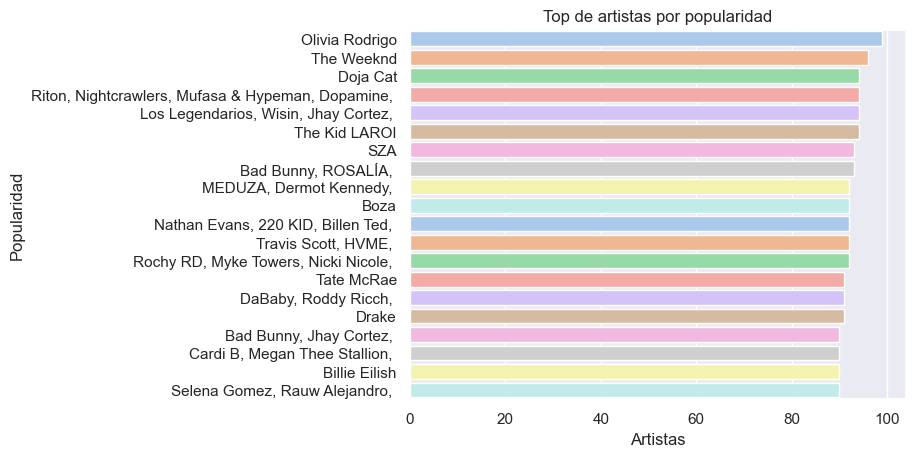

In [94]:

sns.barplot(x=b['popularity'],y=b['top_artists'], orient='h', palette='pastel').set_title('Top de artistas por popularidad')
plt.xlabel('Artistas')
plt.ylabel('Popularidad')

Con la función lambda convertimos cada columna en una serie.
Vamos a visualizar los hits por artista

In [18]:
Top_20 = x.apply(lambda x: pd.Series(x)).stack().value_counts().head(20)

In [19]:
Top_20.reset_index().rename(columns={'index':'artists', 0:'hits'})

artists  hits
0              Die drei ???  3856
1           Lata Mangeshkar  2022
2         TKKG Retro-Archiv  2006
3          Francisco Canaro  1980
4     Johann Sebastian Bach  1768
5   Wolfgang Amadeus Mozart  1691
6         Benjamin Blümchen  1485
7           Bibi Blocksberg  1440
8             Mohammed Rafi  1165
9      Ludwig van Beethoven  1107
10   S. P. Balasubrahmanyam  1062
11    Wiener Philharmoniker  1052
12              Asha Bhosle  1002
13           Giuseppe Verdi  1001
14          Ella Fitzgerald   940
15              P. Susheela   931
16                   Tintin   919
17            Bert-Åke Varg   914
18              Tomas Bolme   905
19            Bibi und Tina   900

Grafica

Text(0, 0.5, 'Artistas')

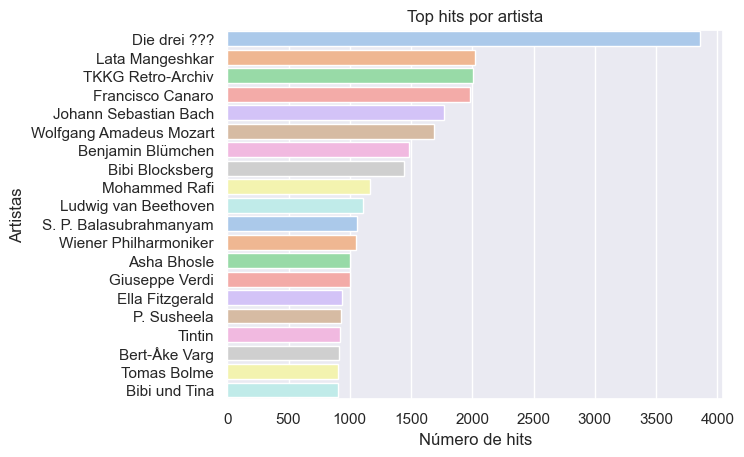

In [20]:
top_artists1 = Top_20.reset_index().rename(columns={'index':'artists', 0:'hits'})
sns.barplot(x=top_artists1['hits'], y=top_artists1['artists'], orient='h', palette='pastel').set_title('Top hits por artista')

plt.xlabel('Número de hits')
plt.ylabel('Artistas')

YEARS: para la visualización general, necesitamos crear una nueva columna que nos indique los años .
Nos quedamos sólo con el año en la columna release_date (año de lanzamiento) y creamos una variable llamada Years que contiene una serie .

In [21]:
years = df_tracks.release_date.dt.year
years

0         1922
1         1922
2         1922
3         1922
4         1922
          ... 
526779    2020
526780    2020
526781    2020
526782    2021
526783    2015
Name: release_date, Length: 526784, dtype: int64

In [22]:
df_tracks['years'] = years

In [23]:
tracks_by_year = df_tracks.groupby('years').count()
tracks_by_year.head(3)

id  name  popularity  duration_ms  explicit  artists  id_artists  \
years                                                                      
1900     1     1           1            1         1        1           1   
1922   260   260         260          260       260      260         260   
1923   609   609         609          609       609      609         609   

       release_date  danceability  energy  key  loudness  mode  speechiness  \
years                                                                         
1900              1             1       1    1         1     1            1   
1922            260           260     260  260       260   260          260   
1923            609           609     609  609       609   609          609   

       acousticness  instrumentalness  liveness  valence  tempo  \
years                                                             
1900              1                 1         1        1      1   
1922            260               260       260      260    260   
1923            609               609       609      609    609   

       time_signature  
years                  
1900                1  
1922              260  
1923              609

In [24]:

num_tracks_by_year = df_tracks.groupby(df_tracks.release_date.dt.year)['release_date'].count()
num_tracks_by_year

release_date
1900        1
1922      260
1923      609
1924      612
1925      648
        ...  
2017     9333
2018    10290
2019    11105
2020    13006
2021     4619
Name: release_date, Length: 101, dtype: int64

Añadimos la gráfica. Añadiremos un análisis por décadas . 

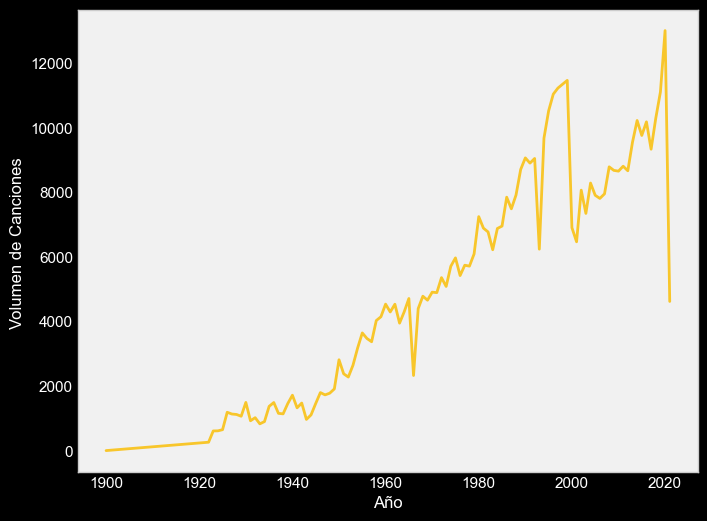

In [24]:

fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('black')
plt.style.use('seaborn-whitegrid')

ax = num_tracks_by_year.plot()
plt.grid(False)
# Personalizar línea
#ax.set_title('Canciones lanzadas al mercado por año'.title(), c="white")
ax.set_xlabel('Año', c="white")
ax.set_ylabel('Volumen de Canciones ',c="white")
ax.lines[0].set_color('#f8c62b')
ax.lines[0].set_linewidth(2)

# Personalizar ejes
ax.tick_params(axis='both', which='both', colors='white')
# Cambiar el fondo de la gráfica
ax.set_facecolor('#F1F1F1')

ax.tick_params(axis='x', colors='white')  #<- cambia el color de los numeros en los ejes
ax.tick_params(axis='y', colors='white')  #<- cambia el color de los numeros en los ejes
plt.show()

La función groupby agrupa los datos por el valor de la columna "years". Mean calcula la media de los valores de la columna "danceability" de cada grupo. El resultado se almacena en la variable num_tracks_by_danceability.

In [25]:

num_tracks_by_danceability = df_tracks.groupby('years')['danceability'].mean()
num_tracks_by_danceability

years
1900    0.659000
1922    0.549612
1923    0.640627
1924    0.595859
1925    0.610806
          ...   
2017    0.625553
2018    0.634280
2019    0.650071
2020    0.656055
2021    0.657813
Name: danceability, Length: 101, dtype: float64

Mostramos el resultado gráfico.La columna "danceability" en un conjunto de datos de música generalmente representa una medida sobre qué tan fácil es bailar una canción, basada en una combinación de elementos como el ritmo, la estabilidad del tempo y la regularidad del sonido.

Los valores de la columna "danceability" pueden variar entre 0 y 1, donde 0 significa que la canción es difícil de bailar y 1 significa que es muy fácil de bailar.

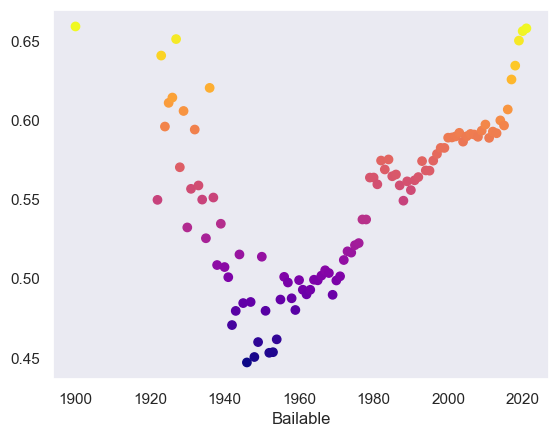

In [26]:
plt.scatter(num_tracks_by_danceability.index, num_tracks_by_danceability,c=num_tracks_by_danceability,  cmap='plasma')
plt.xlabel('Bailable')
plt.ylabel('')
plt.grid(b=False)
plt.show()

In [27]:
num_tracks_by_valence = df_tracks.groupby('years')['valence'].mean()
num_tracks_by_valence

years
1900    0.956000
1922    0.582165
1923    0.678568
1924    0.551953
1925    0.609051
          ...   
2017    0.494223
2018    0.483928
2019    0.492963
2020    0.497560
2021    0.475902
Name: valence, Length: 101, dtype: float64

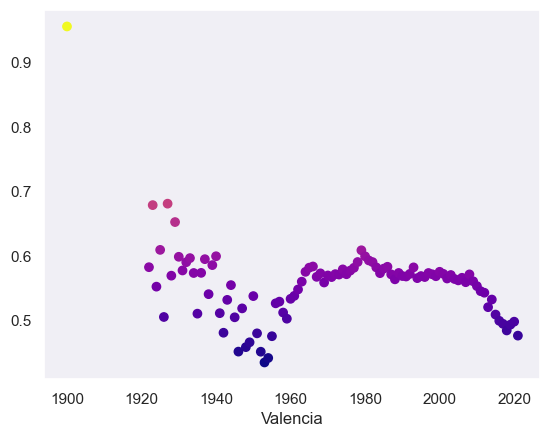

In [28]:
plt.scatter(num_tracks_by_valence.index, num_tracks_by_valence, c=num_tracks_by_valence, cmap='plasma')
plt.xlabel('Valencia')
plt.ylabel('')

# Obtenemos los ejes actuales y establecemos el color del fondo del grid a blanco
ax = plt.gca()
ax.set_facecolor('#f0eff5')

plt.grid(b=False)
plt.show()

In [36]:
num_tracks_by_timesig = df_tracks.groupby('years')['time_signature'].mean()
num_tracks_by_timesig

years
1900    4.000000
1922    3.715385
1923    3.640394
1924    3.745098
1925    3.734568
          ...   
2017    3.934319
2018    3.940816
2019    3.942999
2020    3.948793
2021    3.925958
Name: time_signature, Length: 101, dtype: float64

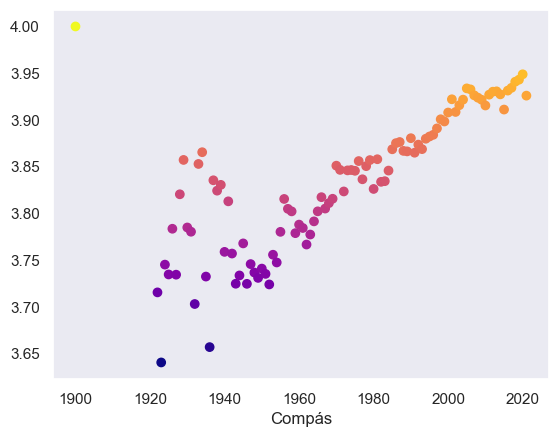

In [37]:
plt.scatter(num_tracks_by_timesig.index, num_tracks_by_timesig,c=num_tracks_by_timesig,  cmap='plasma')
plt.xlabel('Compás')
plt.ylabel('')
plt.grid(b=False)
plt.show()

In [ ]:
num_tracks_by_popularity = df_tracks.groupby('years')['popularity'].mean()
num_tracks_by_popularity

In [68]:
num_tracks_by_duration = df_tracks.groupby('years')['duration'].mean()
num_tracks_by_duration

years
1900    234.000000
1922    164.561538
1923    154.871921
1924    189.401961
1925    195.671296
           ...    
2017    229.726026
2018    220.451118
2019    216.237010
2020    203.676149
2021    194.348777
Name: duration, Length: 101, dtype: float64

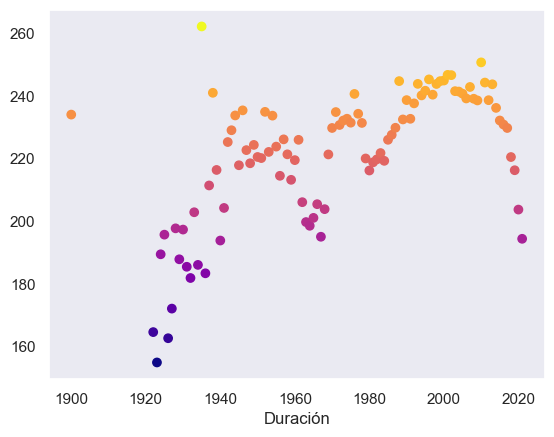

In [69]:
plt.scatter(num_tracks_by_duration.index, num_tracks_by_duration,c=num_tracks_by_duration,  cmap='plasma')
plt.xlabel('Duración')
plt.ylabel('')
plt.grid(b=False)
plt.show()

In [31]:
num_tracks_by_tempo = df_tracks.groupby('years')['tempo'].mean()
num_tracks_by_tempo

years
1900    141.999000
1922    110.096508
1923    108.803718
1924    119.233158
1925    111.731880
           ...    
2017    121.385013
2018    121.669517
2019    122.035564
2020    122.459264
2021    120.791616
Name: tempo, Length: 101, dtype: float64

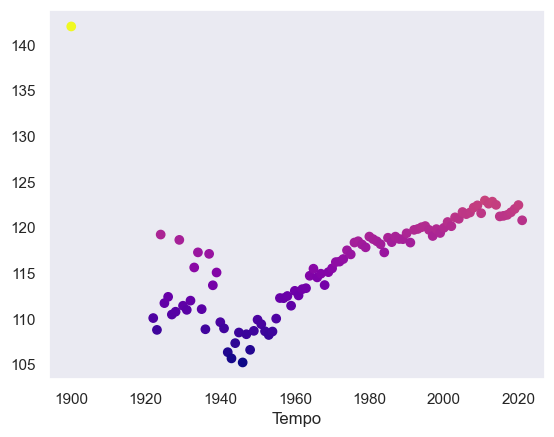

In [32]:
plt.scatter(num_tracks_by_tempo.index, num_tracks_by_tempo,c=num_tracks_by_tempo,  cmap='plasma')
plt.xlabel('Tempo')
plt.ylabel('')
plt.grid(b=False)
plt.show()

In [33]:
num_tracks_by_instrumentalness = df_tracks.groupby('years')['instrumentalness'].mean()
num_tracks_by_instrumentalness

years
1900    0.000002
1922    0.317395
1923    0.142992
1924    0.333322
1925    0.238441
          ...   
2017    0.087558
2018    0.097557
2019    0.080114
2020    0.118255
2021    0.154716
Name: instrumentalness, Length: 101, dtype: float64

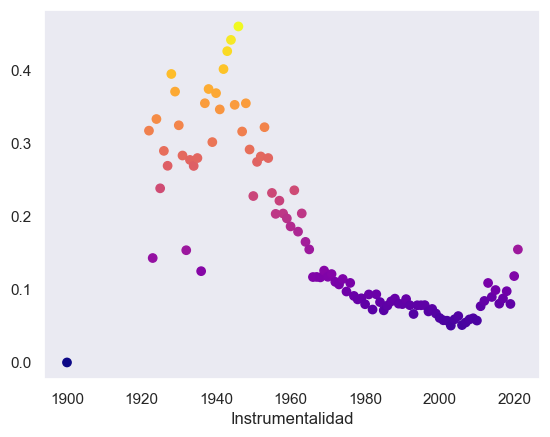

In [34]:
plt.scatter(num_tracks_by_instrumentalness.index, num_tracks_by_instrumentalness,c=num_tracks_by_instrumentalness,  cmap='plasma')
plt.xlabel('Instrumentalidad')
plt.ylabel('')
plt.grid(b=False)
plt.show()

In [78]:
df_tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'years'],
      dtype='object')

Valence: Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con una valencia alta suenan más positivas 

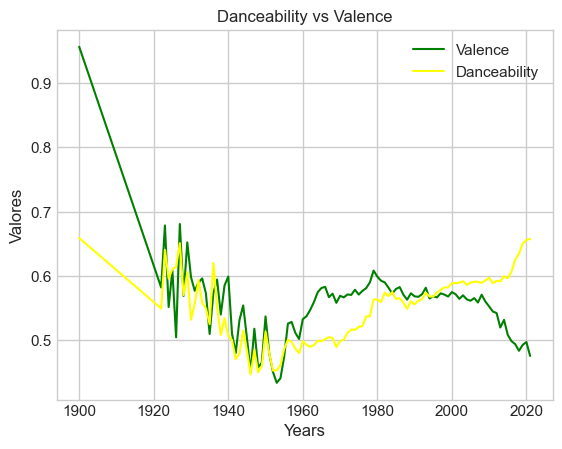

In [74]:
plt.plot(num_tracks_by_valence.index, num_tracks_by_valence, color = "green", label = "Valence")
plt.plot(num_tracks_by_danceability.index, num_tracks_by_danceability, color='yellow', label='Danceability')

ax = plt.gca()
ax.set_facecolor('white')

plt.title('Danceability vs Valence')
plt.xlabel('Years')
plt.ylabel('Valores')
plt.legend()
plt.show()

funcion para crear una nueva columna decada: nos quedamos con los primeros tres numeros y luego multiplicando por 10 nos da la decada. Creamos una nueva columna decada aplicando la funcion a cada año

In [70]:
def year_to_decade(years):
    decade = (years//10) * 10
    decade = f'{decade}s'
    return decade

df_tracks['decade'] = df_tracks['years'].apply(lambda x: year_to_decade(x))


Compruebo su está añadida la columna década

In [71]:
df_tracks.decade

0         1920s
1         1920s
2         1920s
3         1920s
4         1920s
          ...  
526779    2020s
526780    2020s
526781    2020s
526782    2020s
526783    2010s
Name: decade, Length: 526784, dtype: object

Ahora lo hacemos gráficamente :

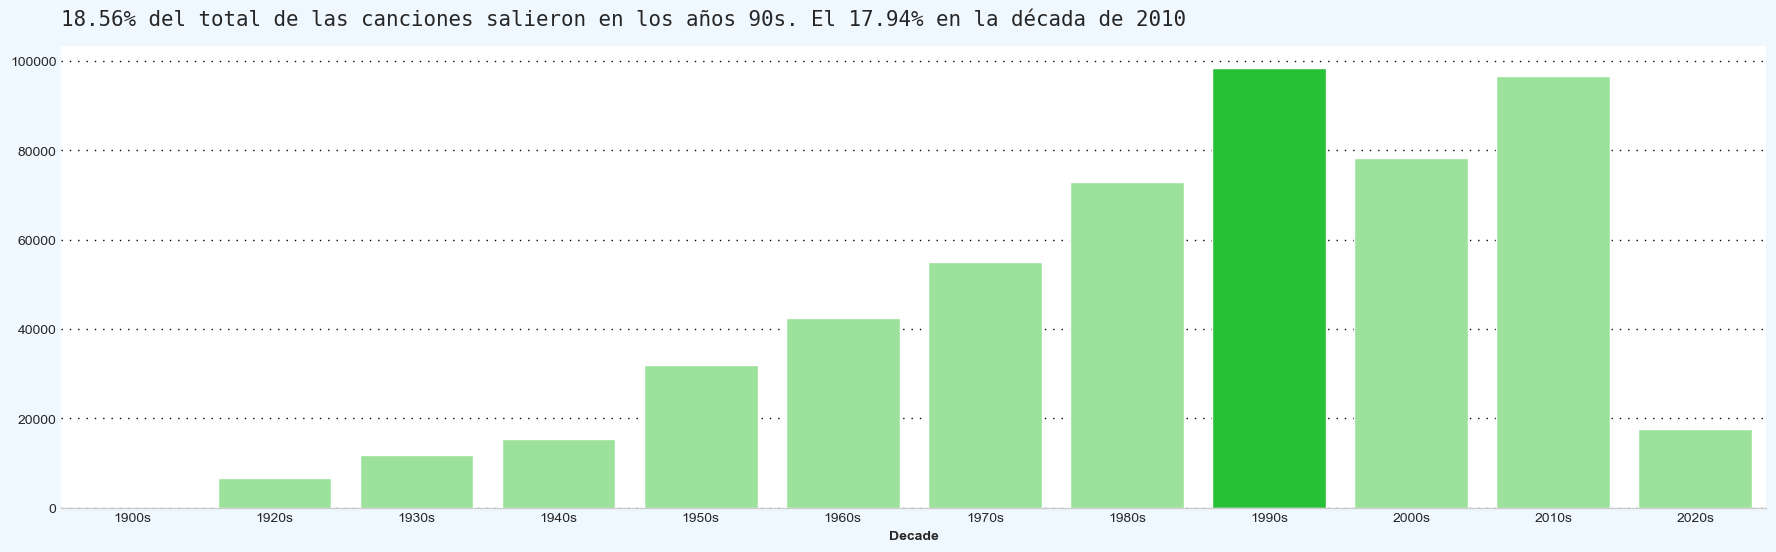

In [49]:

df_tracks = df_tracks.sort_values('decade')
fig = plt.figure(figsize = (22,6),facecolor = 'AliceBlue')
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])


ax.text(-0.5, 108000, 
         "18.56% del total de las canciones salieron en los años 90s. El 17.94% en la década de 2010" , 
         fontsize=15, 
         fontweight='light', 
         fontfamily='monospace'
        )

ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))


colormap = ["lightgreen" for _ in range(12)]
colormap[8] = "#0ddb22"

sns.countplot(data = df_tracks, x ='decade', ax = ax, palette = colormap, alpha = 1, zorder = 2)


for direction in ['top','right','left']:
    ax.spines[direction].set_visible(False)

ax.set_xlabel('Decade', fontsize = 10, fontweight = 'bold')
ax.tick_params(axis = 'x', labelsize=10)
ax.tick_params(axis = 'y', length=0, labelsize=10)
ax.set_ylabel('',)
plt.savefig('decadas_canciones.svg', dpi=100)

por si hay que guardar la imagen

In [57]:
from IPython.display import Image
Image('decadas_canciones.png')
plt.show("decadas_canciones.png")

Vamos a ver en porcentajes cuantas canciones salieron en cada década, para añadir la información al grafico (añado datos de los 90´s y 2010)

In [39]:
value_counts = df_tracks.decade.value_counts(normalize=True)
value_counts = value_counts * 100
value_counts = value_counts.round(2).astype(str) + '%'
print(value_counts)

1990s     18.7%
2010s    18.33%
2000s    14.84%
1980s    13.84%
1970s    10.42%
1960s     8.06%
1950s     6.07%
2020s     3.35%
1940s      2.9%
1930s     2.23%
1920s     1.26%
1900s      0.0%
Name: decade, dtype: object


Nos fijamos en los valores de aquellas canciones o artistas por BPM.

In [43]:
most_popular_tempo = df_tracks.query("tempo>=120 and tempo<=122", inplace= False).sort_values(by = "tempo", ascending = False)
most_popular_tempo[:3]

id                   name  popularity  \
101654  2oz9OaVHCouD7SXv7XDXEw  R.l.h. - Original Mix           1   
262577  0NQeyq0DPC0n2Q1fQEqdvc      Man er som man er          15   
485829  7Jg2MXRSkMtb24gclg0qqE           Bye Bye Love          26   

        duration_ms  explicit                          artists  \
101654       291148         1  ['Supernova', 'Ann Saunderson']   
262577       167800         0         ['Eventyrteatrets Børn']   
485829       247000         0              ['George Harrison']   

                                               id_artists release_date  \
101654  ['1vpJBCwcAMbetCwtn2KPEG', '7IItD0N1A3unbTmcIz...   2019-04-12   
262577                         ['00HBvzQnDSvQ4l1lybuE15']   1994-01-01   
485829                         ['7FIoB5PHdrMZVC3q2HE5MS']   1974-12-09   

        danceability  energy  ...  mode  speechiness  acousticness  \
101654         0.846   0.897  ...     1       0.0636        0.0317   
262577         0.716   0.840  ...     1       0.0290        0.2140   
485829         0.665   0.517  ...     0       0.0332        0.7230   

        instrumentalness  liveness  valence  tempo  time_signature  years  \
101654          0.299000    0.1950    0.511  122.0               4   2019   
262577          0.000028    0.5720    0.892  122.0               4   1994   
485829          0.003710    0.0988    0.857  122.0               4   1974   

        decade  
101654   2010s  
262577   1990s  
485829   1970s  

[3 rows x 22 columns]

In [43]:
basic_stat = df_tracks.describe().transpose()


Creamos una función para que los valores no estén en notaciones científicas y sean más legibles, con dos decimales . Aquí podemos sacar algunas conclusiones sobre la normalidad, dado que en varias variables media y moda son practicamente iguales, parecen centradas ,lo que podría indicar normalidad.

In [44]:
Bstat = basic_stat.applymap(lambda x: '{:.2f}'.format(x))
Bstat

count       mean        std      min        25%  \
popularity        526784.00      26.90      17.88     0.00      12.00   
duration_ms       526784.00  229498.96  128913.72  4000.00  173702.25   
explicit          526784.00       0.04       0.21     0.00       0.00   
danceability      526784.00       0.56       0.17     0.00       0.45   
energy            526784.00       0.54       0.25     0.00       0.34   
key               526784.00       5.22       3.52     0.00       2.00   
loudness          526784.00     -10.26       5.11   -60.00     -12.95   
mode              526784.00       0.66       0.47     0.00       0.00   
speechiness       526784.00       0.11       0.19     0.00       0.03   
acousticness      526784.00       0.45       0.35     0.00       0.10   
instrumentalness  526784.00       0.11       0.27     0.00       0.00   
liveness          526784.00       0.22       0.19     0.00       0.10   
valence           526784.00       0.55       0.26     0.00       0.35   
tempo             526784.00     118.40      29.81     0.00      95.46   
time_signature    526784.00       3.87       0.48     0.00       4.00   
years             526784.00    1988.77      22.79  1900.00    1974.00   

                        50%        75%         max  
popularity            26.00      40.00       99.00  
duration_ms       214134.00  263560.00  5621218.00  
explicit               0.00       0.00        1.00  
danceability           0.58       0.69        0.99  
energy                 0.55       0.75        1.00  
key                    5.00       8.00       11.00  
loudness              -9.28      -6.52        5.38  
mode                   1.00       1.00        1.00  
speechiness            0.04       0.08        0.97  
acousticness           0.43       0.79        1.00  
instrumentalness       0.00       0.01        1.00  
liveness               0.14       0.28        1.00  
valence                0.56       0.77        1.00  
tempo                117.22     136.37      246.38  
time_signature         4.00       4.00        5.00  
years               1993.00    2007.00     2021.00

Modificamos el dataframe original con inplace y ponemos un nuevo indice 

In [44]:
df_tracks.set_index("release_date", inplace = True)
df_tracks.index = pd.to_datetime(df_tracks.index)
df_tracks.tail()


id                       name  popularity  \
release_date                                                                  
2020-09-26    5rgu12WBIHQtvej2MdHSH0                        云与海          50   
2020-10-21    0NuWgxEp51CutD2pJoF4OM                      blind          72   
2020-09-02    27Y1N4Q4U3EfDU5Ubw8ws2  What They'll Say About Us          70   
2021-03-05    45XJsGpFTyzbzeWK8VzR8S            A Day At A Time          58   
2015-07-01    5Ocn6dZ3BJFPWh4ylwFXtn           Mar de Emociones          38   

              duration_ms  explicit                          artists  \
release_date                                                           
2020-09-26         258267         0                      ['阿YueYue']   
2020-10-21         153293         0                   ['ROLE MODEL']   
2020-09-02         187601         0                      ['FINNEAS']   
2021-03-05         142003         0  ['Gentle Bones', 'Clara Benin']   
2015-07-01         214360         0                    ['Afrosound']   

                                                     id_artists  danceability  \
release_date                                                                    
2020-09-26                           ['1QLBXKM5GCpyQQSVMNZqrZ']         0.560   
2020-10-21                           ['1dy5WNgIKQU6ezkpZs4y8z']         0.765   
2020-09-02                           ['37M5pPGs6V1fchFJSgCguX']         0.535   
2021-03-05    ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...         0.696   
2015-07-01                           ['0i4Qda0k4nf7jnNHmSNpYv']         0.686   

              energy  key  ...  mode  speechiness  acousticness  \
release_date               ...                                    
2020-09-26     0.518    0  ...     0       0.0292         0.785   
2020-10-21     0.663    0  ...     1       0.0652         0.141   
2020-09-02     0.314    7  ...     0       0.0408         0.895   
2021-03-05     0.615   10  ...     1       0.0345         0.206   
2015-07-01     0.723    6  ...     1       0.0363         0.105   

              instrumentalness  liveness  valence    tempo  time_signature  \
release_date                                                                 
2020-09-26            0.000000    0.0648   0.2110  131.896               4   
2020-10-21            0.000297    0.0924   0.6860  150.091               4   
2020-09-02            0.000150    0.0874   0.0663  145.095               4   
2021-03-05            0.000003    0.3050   0.4380   90.029               4   
2015-07-01            0.000000    0.2640   0.9750  112.204               4   

              years  decade  
release_date                 
2020-09-26     2020   2020s  
2020-10-21     2020   2020s  
2020-09-02     2020   2020s  
2021-03-05     2021   2020s  
2015-07-01     2015   2010s  

[5 rows x 21 columns]

Fórmula para convertir la duracion a minutos, pero se pierde mucha información , mejor a segundos 

In [45]:
"""df_tracks["duration_min"]= df_tracks["duration_ms"]/60000
df_tracks["duration_min"] = df_tracks["duration_min"].astype(int)
df_tracks.columns = df_tracks.columns.tolist()
df_tracks.head()
df_tracks.columns[19]"""

'df_tracks["duration_min"]= df_tracks["duration_ms"]/60000\ndf_tracks["duration_min"] = df_tracks["duration_min"].astype(int)\ndf_tracks.columns = df_tracks.columns.tolist()\ndf_tracks.head()\ndf_tracks.columns[19]'

Usamos una función para convertir de milisegundos a segundos 

In [46]:
df_tracks["duration_ms"].apply(lambda x: round(x/1000))

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
             ... 
2020-09-26    258
2020-10-21    153
2020-09-02    188
2021-03-05    142
2015-07-01    214
Name: duration_ms, Length: 526784, dtype: int64

Cambiamos a duracion segundos creando una columna y eliminado milisegundos 

In [47]:
df_tracks["duration"] = df_tracks["duration_ms"].apply(lambda x: round(x/1000))
df_tracks.drop("duration_ms", axis = 1, inplace = True)
df_tracks.duration.head()

release_date
1922-02-22    127
1922-06-01     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

2. Pruebas de CORRELACIÓN

Heatmap con las correlaciones para ver las interesantes.  Varias pruebas hechas con colores, lineas  etc

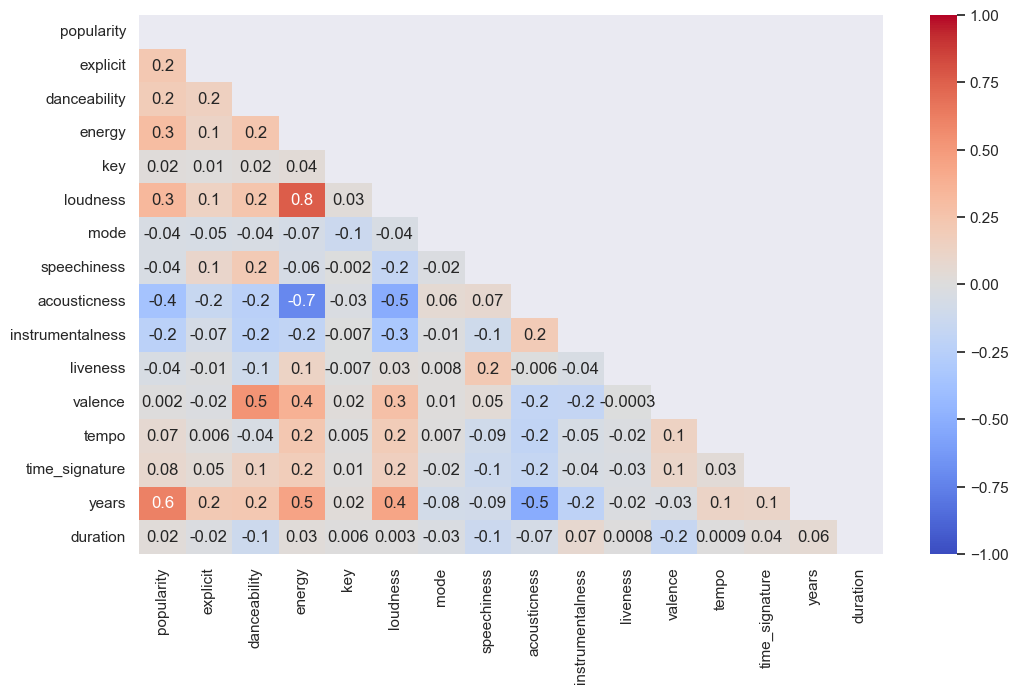

In [48]:
#matriz de correlación como fuente de datos
corr = df_tracks.corr()
# tamaño de la figura 
ax = plt.subplots(figsize=(12,7))

#máscara para evitar tener un espejo 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".1g",vmin=-1,vmax=1, center=0,mask = mask) #viridis


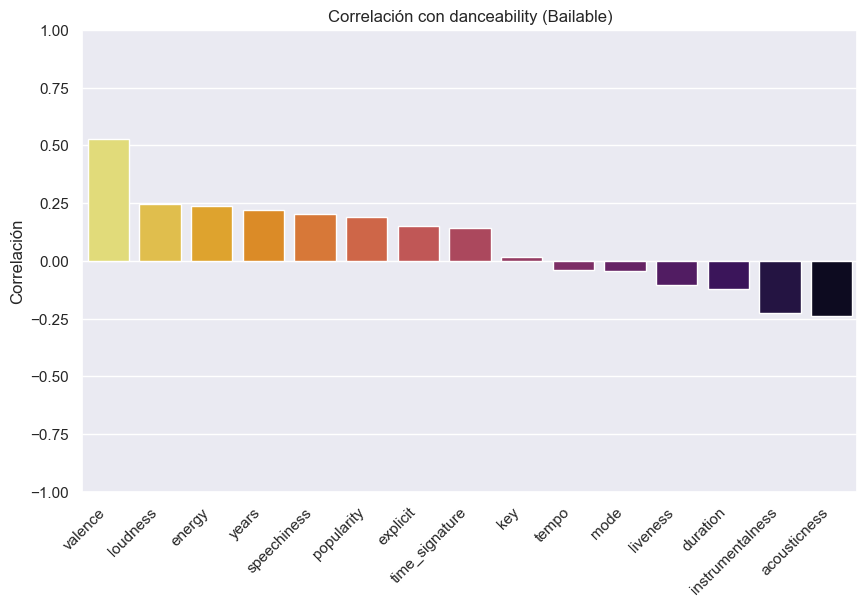

In [49]:
corr_sorted = corr.drop('danceability')['danceability'].sort_values(ascending=False)

# Seleccionar la paleta de colores 'inferno' en orden inverso
palette = sns.color_palette('inferno', len(corr)-1)[::-1]

plt.figure(figsize=(10,6))
ax = sns.barplot(x=corr_sorted.index, y=corr_sorted, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Correlación con danceability (Bailable)')
plt.xlabel('')
plt.ylabel('Correlación')
plt.ylim([-1, 1]) # fija el rango del eje y
plt.show()



Empiezo a hacer visualizaciones de las correlaciones

In [65]:
df_tracks['explicit'].corr(df_tracks['popularity'])

0.22131625058433607

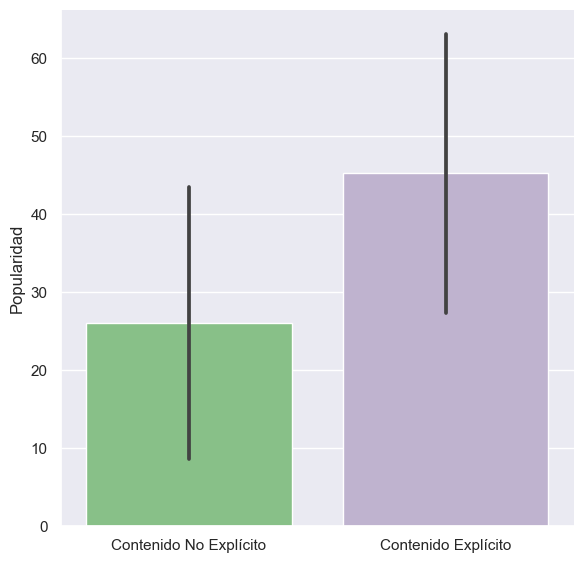

In [50]:
datos = sns.catplot(data=df_tracks, kind="bar",
                        x="explicit", y="popularity",
                        ci="sd", palette='Accent',
                        height=6)
datos.set_axis_labels("", "Popularidad")
datos.set_xticklabels(['Contenido No Explícito', 'Contenido Explícito'])
plt.show()

Generalmente, y por tradición, a las escalas de modo mayor se les relaciona con sentimientos de alegría. En cambio, a las escalas menores, se les relaciona con la tristeza. Esta concepción cultural del sonido se ha ido construyendo desde la época del Barroco, por allá en el siglo XVII. Sin embargo, esta concepción sonora de los modos mayor y menor no aplica siempre. Hay otros elementos en una obra musical como el ritmo, la textura, la instrumentación, el perfil melódico, entre otros, que pueden influir en que, por ejemplo, el modo mayor suene triste y el modo menor alegre. Todo se reduce a lo que hemos comentado antes: la concepción cultural del sonido.

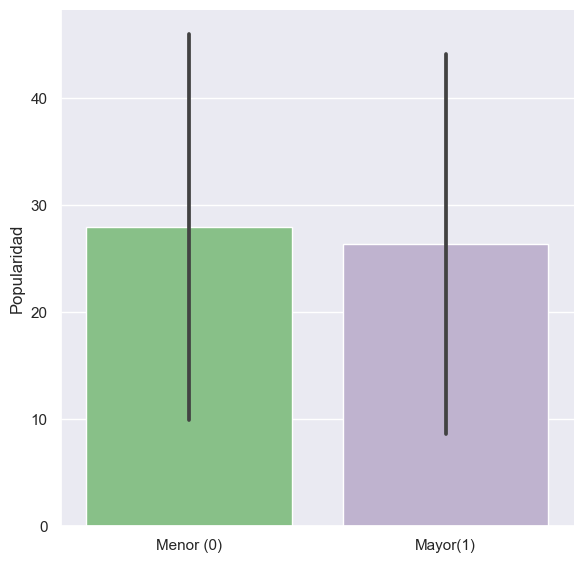

In [63]:
datos = sns.catplot(data=df_tracks, kind="bar",
                        x="mode", y="popularity",
                        ci="sd", palette='Accent',
                        height=6)
datos.set_axis_labels("", "Popularidad")
datos.set_xticklabels(['Menor (0)', 'Mayor(1)'])
plt.show()

In [62]:
df_tracks.columns

Index(['id', 'name', 'popularity', 'explicit', 'artists', 'id_artists',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'years', 'decade', 'duration'],
      dtype='object')

Vamos a ver visualmente las correlaciones

In [130]:
audio_feature_headers = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

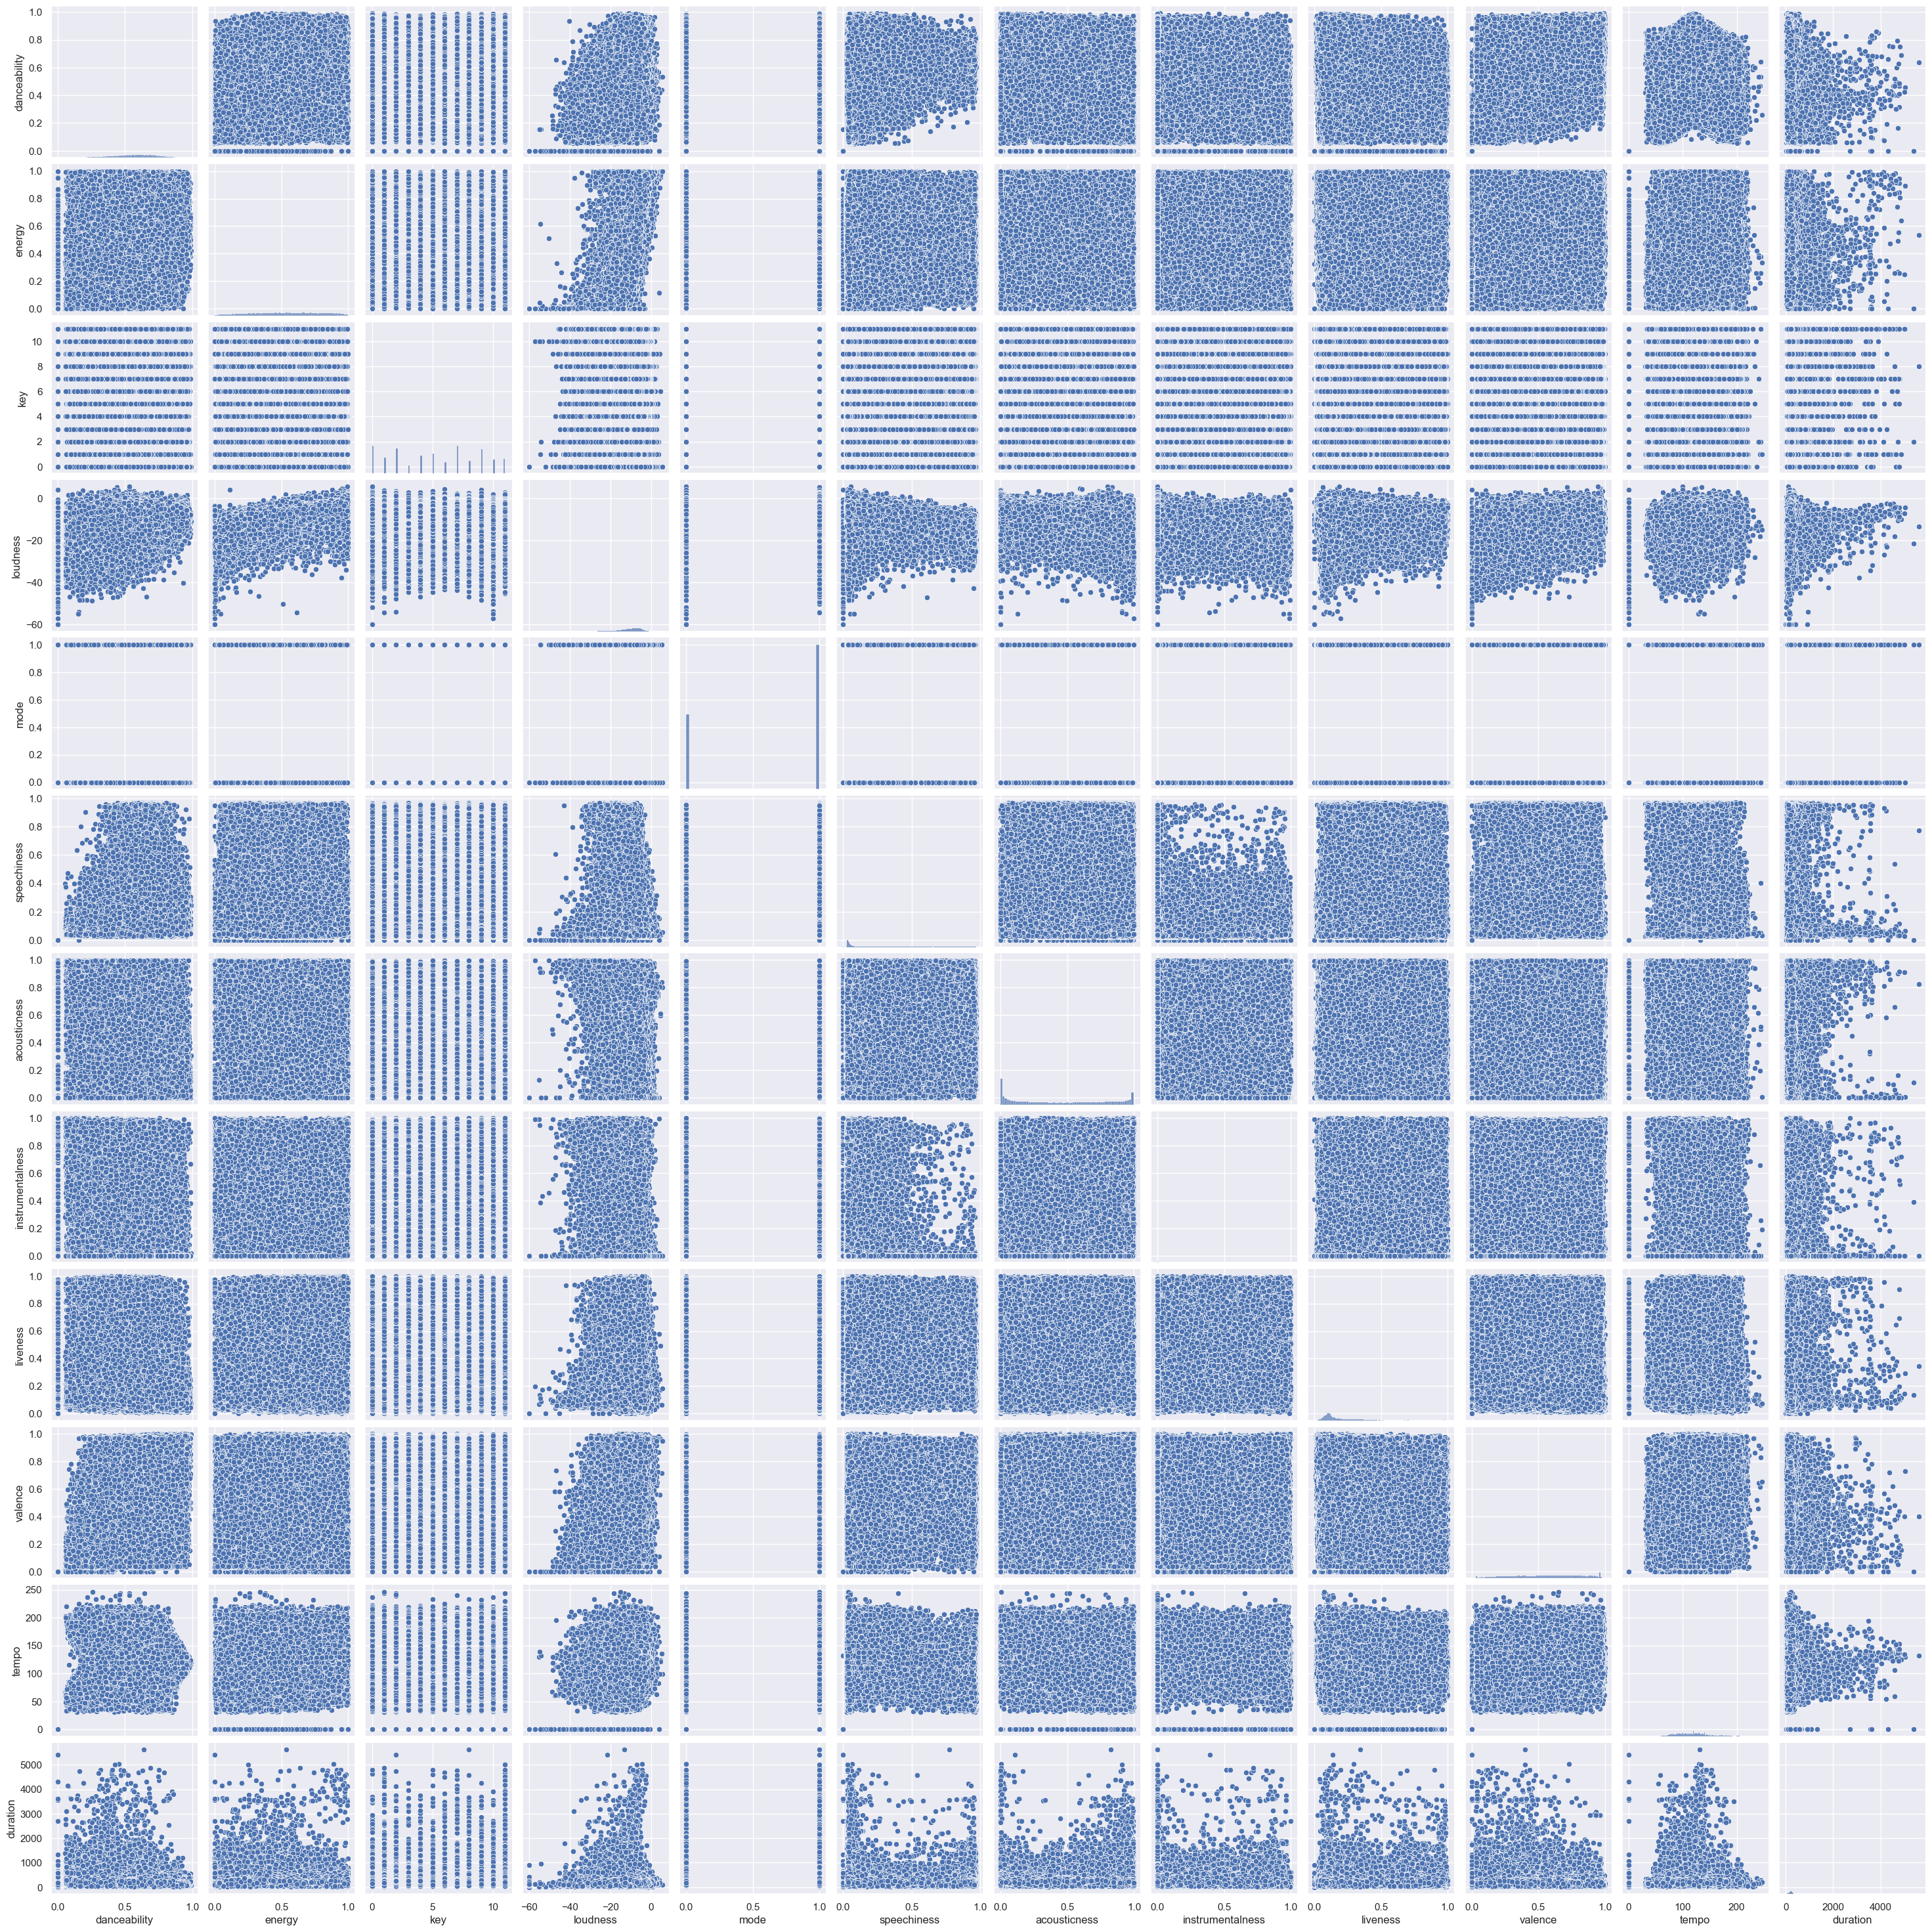

In [135]:
sns.pairplot(df_tracks[audio_feature_headers])
plt.show()

Aqui vemos las posibles correlaciones entre dos variables para luego elegir una para el contraste de hipótesis . Por ejemplo popularidad con las demás caracter´ñisticas. Ongoing ....lo que ayudaría a la producción musical y el marketing. 

Las más altas son estas dos correlaciones

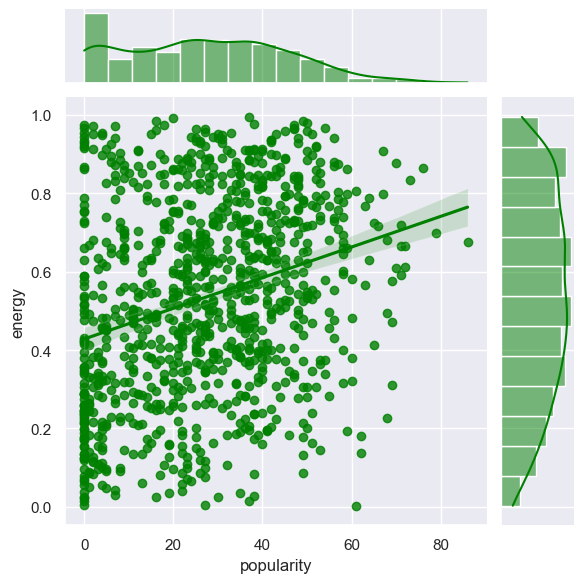

In [59]:
df_tracks = df_tracks.drop_duplicates() # remove duplicate rows
df_tracks = df_tracks.reset_index(drop=True) # reset the index
g = sns.jointplot(x='popularity', y='energy', data=df_tracks.sample(1000), kind='reg', color='green');

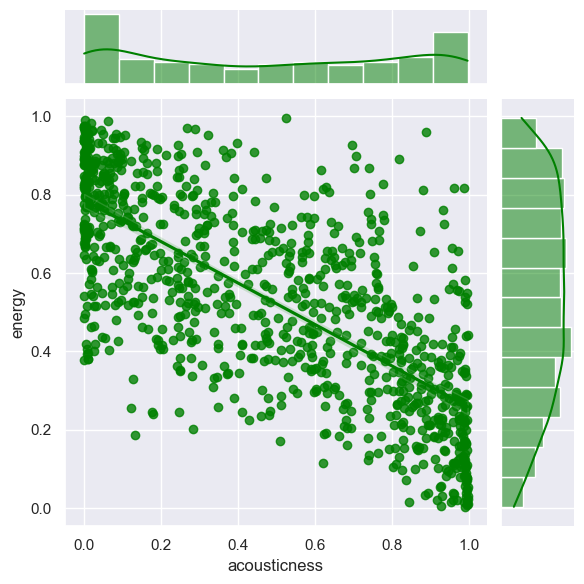

In [60]:
df_tracks = df_tracks.drop_duplicates() # remove duplicate rows
df_tracks = df_tracks.reset_index(drop=True) # reset the index
g = sns.jointplot(x='acousticness', y='energy', data=df_tracks.sample(1000), kind='reg', color='green');

distribution plots: quiero ver si visualmente existe normalidad antes de hacer los tests de NORMALIDAD. 

array([[<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'popularity'}>]], dtype=object)

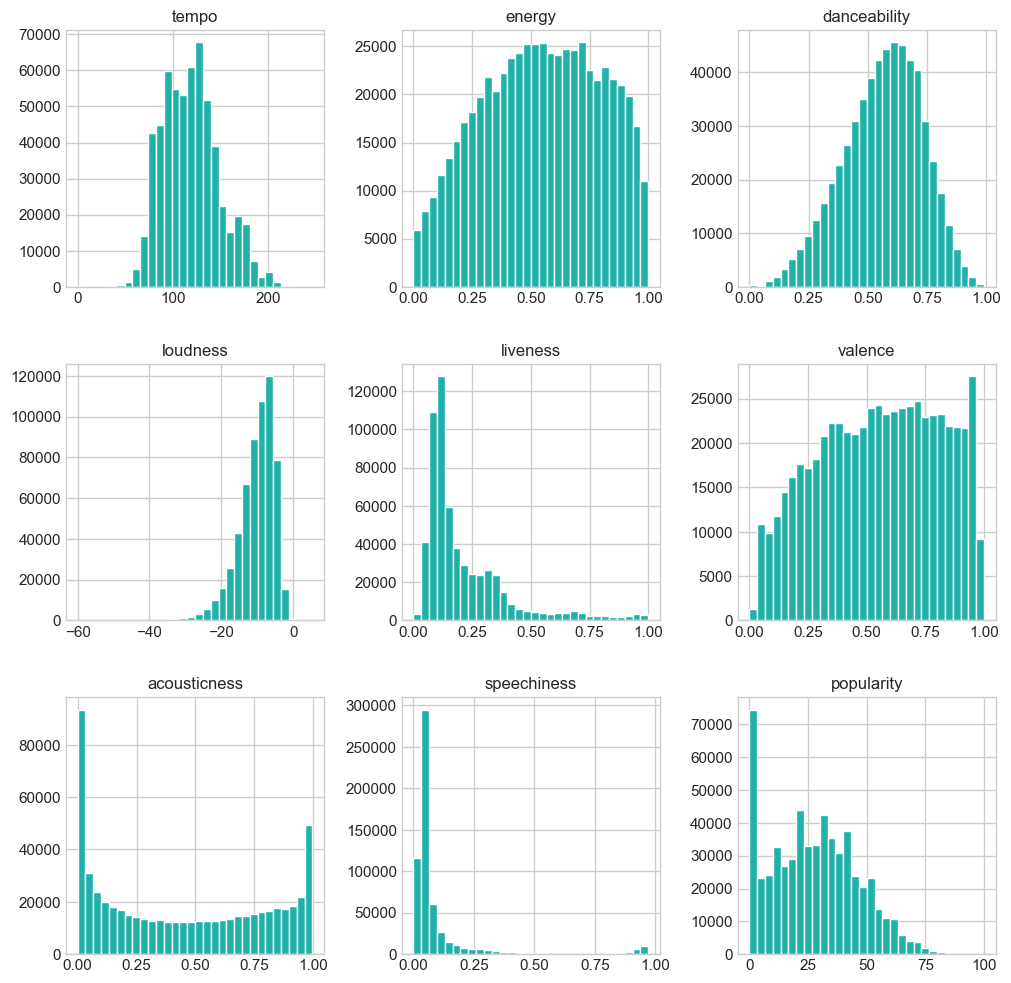

In [136]:
df_tracks[['tempo', 'energy', 'danceability', 'loudness', 'liveness', 
    'valence', 'acousticness','speechiness', 'popularity']].hist(bins=30, figsize = (12,12), color='lightseagreen')

Gráfico versión 2

In [100]:
from matplotlib.ticker import AutoLocator

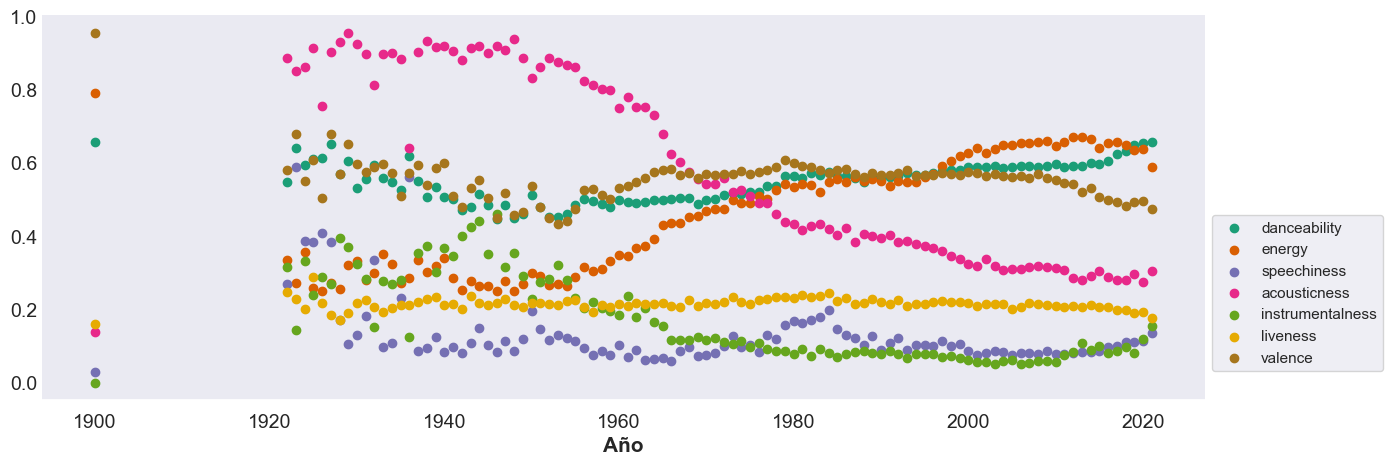

In [114]:
caract_audios = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']


colormap = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']

audio_data = pd.DataFrame(df_tracks.groupby('years')[caract_audios].mean().sort_index()).reset_index()

fig, ax = plt.subplots(figsize=(15, 5), facecolor='white')
ax.grid(False)
#ax.text(1922, 1.1, 
        # 'Distribución en el tiempo de las características de las  pistas', 
         #fontsize=25, 
         #fontweight='bold', 
         #fontfamily='monospace')

for i, feature in enumerate(caract_audios):
    ax.scatter(audio_data['years'], audio_data[feature], color=colormap[i], label=feature)

for direction in ['top', 'right', 'left']:
    ax.spines[direction].set_visible(False)

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', length=0)  
ax.set_xlabel('Año', fontsize=15, fontweight='bold')
ax.set_ylabel('')
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='best', fontsize=11)

plt.show()

PARTE 2: TEST DE HIPOTESIS Y CORRELACIONES

Pruebas estadísticas:  para verificar si un conjunto de datos sigue una distribución normal, como la prueba de Kolmogorov-Smirnov o la prueba de Shapiro-Wilk. Estas pruebas calculan un estadístico y un valor p, que se utiliza para determinar si los datos se ajustan a una distribución normal.

In [141]:
# Seleccionar las columnas "danceability" y "energy"
cols = ["danceability", "energy"]
data = df_tracks[cols]

# Calcular la matriz de correlaciones utilizando el coeficiente de Pearson
corr_df = data.corr(method="pearson")

# Imprimir la matriz de correlaciones
print(corr_df)

              danceability    energy
danceability      1.000000  0.241563
energy            0.241563  1.000000


Prueba de Shapiro-Wilk: esta prueba de hipótesis estadística puede utilizarse para determinar si una muestra de datos proviene de una distribución normal. La hipótesis nula es que los datos provienen de una distribución normal. Si el valor p asociado con la prueba es mayor que el nivel de significancia (generalmente 0.05), se acepta la hipótesis nula de que los datos provienen de una distribución normal.

Prueba de Kolmogorov-Smirnov: esta prueba de hipótesis estadística también se utiliza para determinar si una muestra de datos sigue una distribución normal. La hipótesis nula es que los datos provienen de una distribución normal. Si el valor p asociado con la prueba es mayor que el nivel de significancia, se acepta la hipótesis nula de que los datos provienen de una distribución normal.

In [145]:
energy = df_tracks['energy']
stat, p = stats.shapiro(energy)
print('Estadístico de prueba = %.3f, valor p = %.3f' % (stat, p))

Estadístico de prueba = 0.974, valor p = 0.000


La biblioteca scipy.stats como shapiro  el valor de significancia alpha por defecto es de 0.05. Si el valor p es menor que 0.05, se rechaza la hipótesis nula de que los datos siguen una distribución normal, de lo contrario, no hay suficiente evidencia para rechazar la hipótesis nula.


In [77]:
danceability = df_tracks['danceability']
stat, p = stats.shapiro(danceability)
print('Estadístico de prueba = %.3f, valor p = %.3f' % (stat, p))

Estadístico de prueba = 0.990, valor p = 0.000


In [12]:
pg.normality(data=df_tracks, dv='danceability', group='mode')

W  pval  normal
mode                        
1     0.991402   0.0   False
0     0.987825   0.0   False

In [5]:
# Test de homocedasticidad
pg.homoscedasticity(data=df_tracks, dv='danceability', group='mode')


W          pval  equal_var
levene  65.281975  6.503395e-16      False

 indica que la hipótesis nula de que las varianzas son iguales ha sido rechazada. Esto significa que debemos asumir que las varianzas de las dos muestras son diferentes al realizar pruebas estadísticas posteriores.

In [9]:
group1 = df_tracks[df_tracks['mode'] == 0]['danceability']
group2 = df_tracks[df_tracks['mode'] == 1]['danceability']

# Realizar t-test con corrección de Welch porque las varianzas han salido diferentes
t, p = ttest_ind(group1, group2, equal_var=False)

# Imprimir resultados
print('t =', t)
print('p =', p)

t = 34.1457686832107
p = 3.610258619429148e-255


Estos valores indican que existe una diferencia significativa entre los grupos en cuanto a su danceability, ya que el valor p es muy pequeño (menor que el nivel de significancia típico de 0.05) y el valor t es muy grande.

La función ttest de paquete Pingouin calcula el p-value, intervalos de confianza y tamaño de efecto.

In [14]:
# Test para datos independientes (p-value, intervalos de confianza)
tempo_alto = df_tracks.loc[df_tracks['mode'] == 0, 'danceability']
tempo_bajo = df_tracks.loc[df_tracks['mode'] == 1, 'danceability']

pg.ttest(x=tempo_alto, y=tempo_bajo, alternative='two-sided', correction=True)

T            dof alternative          p-val         CI95%  \
T-test  34.145769  400381.030589   two-sided  3.610259e-255  [0.01, 0.02]   

         cohen-d       BF10  power  
T-test  0.094416  2.59e+250    1.0

Se rechaza la normalidad . Repetimos con la variable explicit

In [79]:
pg.homoscedasticity(data=df_tracks, dv='danceability', group='explicit')


W          pval  equal_var
levene  81.769815  1.533937e-19      False

In [80]:
group11 = df_tracks[df_tracks['explicit'] == 0]['danceability']
group12 = df_tracks[df_tracks['explicit'] == 1]['danceability']

# Realizar t-test con corrección de Welch porque las varianzas han salido diferentes
t, p = ttest_ind(group11, group12, equal_var=False)

# Imprimir resultados
print('t =', t)
print('p =', p)

t = -113.56231323926333
p = 0.0
